# Embedding Data


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

[6.6713441  3.01387292 6.95097662]


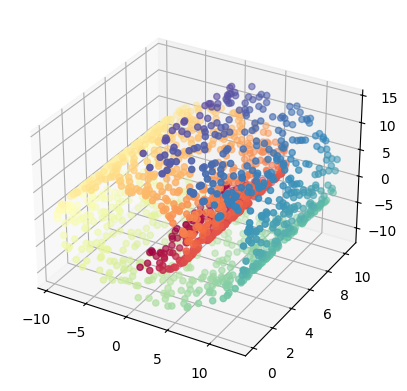

In [6]:
swiss, color = datasets.make_swiss_roll(1600)
swiss[:,1] = swiss[:,1]/2
print(np.std(swiss, axis=0))#, np.std(swiss, axis=1), np.std(swiss, axis=2))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swiss[:, 0], swiss[:,1], swiss[:,2], c=color, cmap=plt.cm.Spectral)

# PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
compressed = pca.fit_transform(swiss)

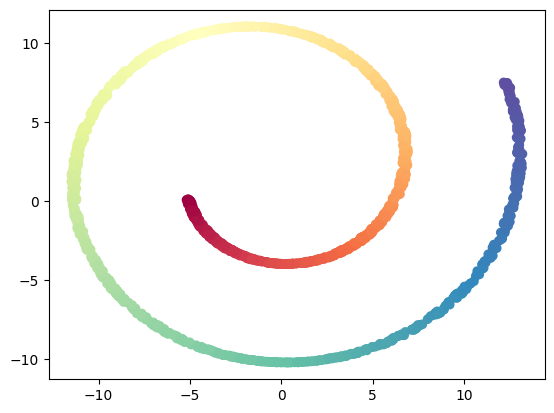

In [4]:
plt.scatter(compressed[:,0], compressed[:,1], c=color, cmap = plt.cm.Spectral)

# Self - Organising Maps

In [8]:
from minisom import MiniSom
#https://github.com/JustGlowing/minisom/blob/master/minisom.py
som = MiniSom(20,25, 3, sigma=0.5, learning_rate=0.5) # initialization of 20 x 25 SOM
som.random_weights_init(swiss)
som.train_random(swiss, 10000)

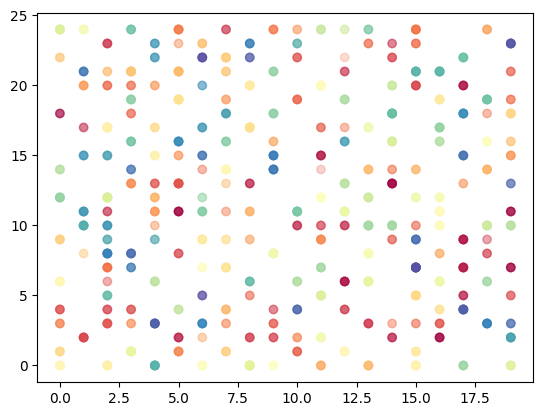

In [12]:
for i, x in enumerate(swiss):
    w = som.winner(x)  # getting the winner
    if i==0:
        res = w
    else:
        res = np.vstack([res, w])
plt.scatter(res[:,0], res[:,1], c=color, cmap=plt.cm.Spectral, alpha=0.25)

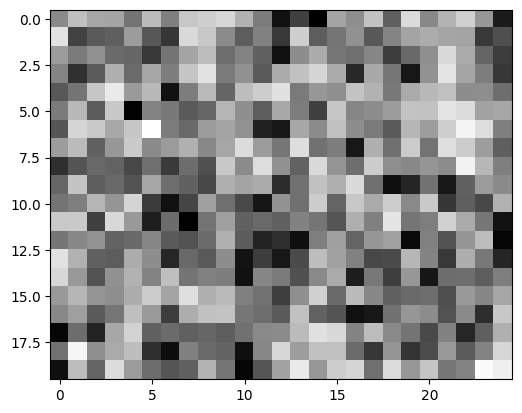

In [13]:
plt.imshow(som._activation_map, cmap="Greys")

# SOM for MNIST digits

In [71]:
#credit: https://github.com/JustGlowing/minisom
#updated by Zhiwu Huang

from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, neighborhood_function='gaussian')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

/Users/zhiwu/Library/CloudStorage/OneDrive-UniversityofSouthampton/3@Southampton/3-Education/1-Teaching/1-AY2023&24/2-DataMining/2-lab/minisom.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.984805993169302


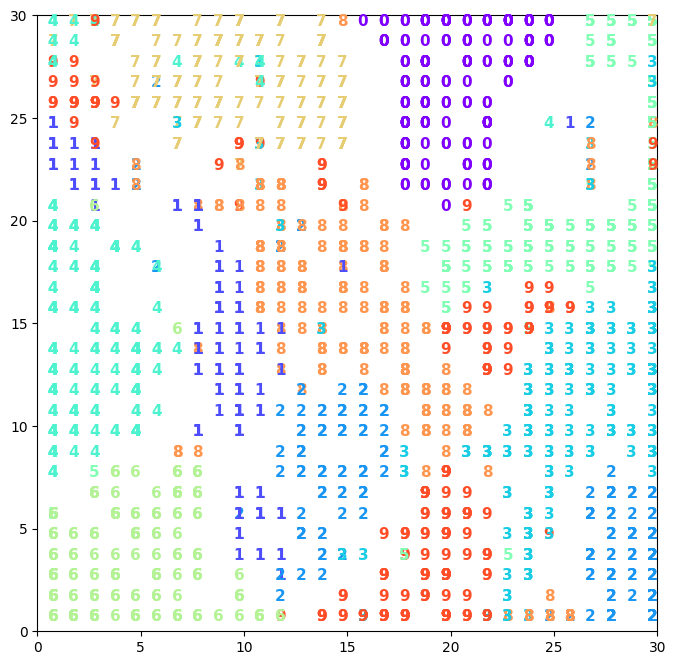

In [72]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('resulting_images/som_digts.png')
plt.show()

# MDS for Swiss roll

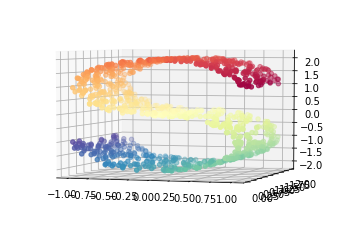

In [9]:
from sklearn.manifold import MDS
n_components = 2
n_points = 1000
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
s_curve, s_color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c=s_color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

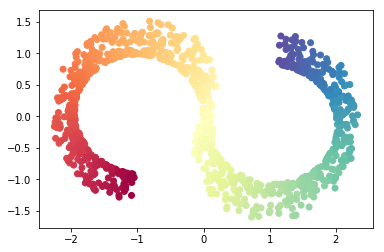

In [10]:
embedding = MDS(n_components, max_iter=1000, n_init=1)
s_MDS = embedding.fit_transform(s_curve)
plt.figure()
plt.scatter(s_MDS[:, 0], s_MDS[:, 1], c=s_color, cmap=plt.cm.Spectral)
plt.show()

In [11]:
import matplotlib.gridspec as gridspec
from sklearn import datasets
from neupy import algorithms, environment

GRID_HEIGHT = 40; GRID_WIDTH = 40
digits = datasets.load_digits()
data = digits.data
sofm = (
    n_inputs=64,
    features_grid=(GRID_HEIGHT, GRID_WIDTH), # Learning radius defines area within which we find
    learning_radius=5, # winning neuron neighbours. The higher the value the more values we will be updated after each iteration.
    # Every 20 epochs learning radius will be reduced by 1.
    reduce_radius_after=20,
    step=0.5,
    std=1,
    shuffle_data=True,
    verbose=False,)
sofm.train(data, epochs=100)
clusters = sofm.predict(data).argmax(axis=1)

print("Building visualization...")
plt.figure(figsize=(12, 11))

grid = gridspec.GridSpec(GRID_HEIGHT, GRID_WIDTH)
grid.update(wspace=0, hspace=0)

for row_id in range(GRID_HEIGHT):
    print("Progress: {:.2%}".format(row_id / GRID_HEIGHT))

    for col_id in range(GRID_WIDTH):
        index = row_id * GRID_HEIGHT + col_id
        clustered_samples = data[clusters == index]

        if len(clustered_samples) > 0:
            # We take the first sample, but it can be any
            # sample from this cluster
            sample = clustered_samples[0]

        else:
            # If we don't have samples in cluster then
            # it means that there is a gap in space
            sample = np.zeros(64)

        plt.subplot(grid[index])
        plt.imshow(sample.reshape((8, 8)), cmap='Greys')
        plt.axis('off')

SyntaxError: invalid syntax (<ipython-input-11-0abb0fd71997>, line 9)

t-SNE

Below is an example from sklearn: https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py

circles, perplexity=5 in 0.23 sec
circles, perplexity=30 in 0.45 sec
circles, perplexity=50 in 0.17 sec
circles, perplexity=100 in 0.15 sec
S-curve, perplexity=5 in 0.11 sec
S-curve, perplexity=30 in 0.14 sec
S-curve, perplexity=50 in 0.15 sec
S-curve, perplexity=100 in 0.15 sec
uniform grid, perplexity=5 in 0.18 sec
uniform grid, perplexity=30 in 0.22 sec
uniform grid, perplexity=50 in 0.18 sec
uniform grid, perplexity=100 in 0.2 sec


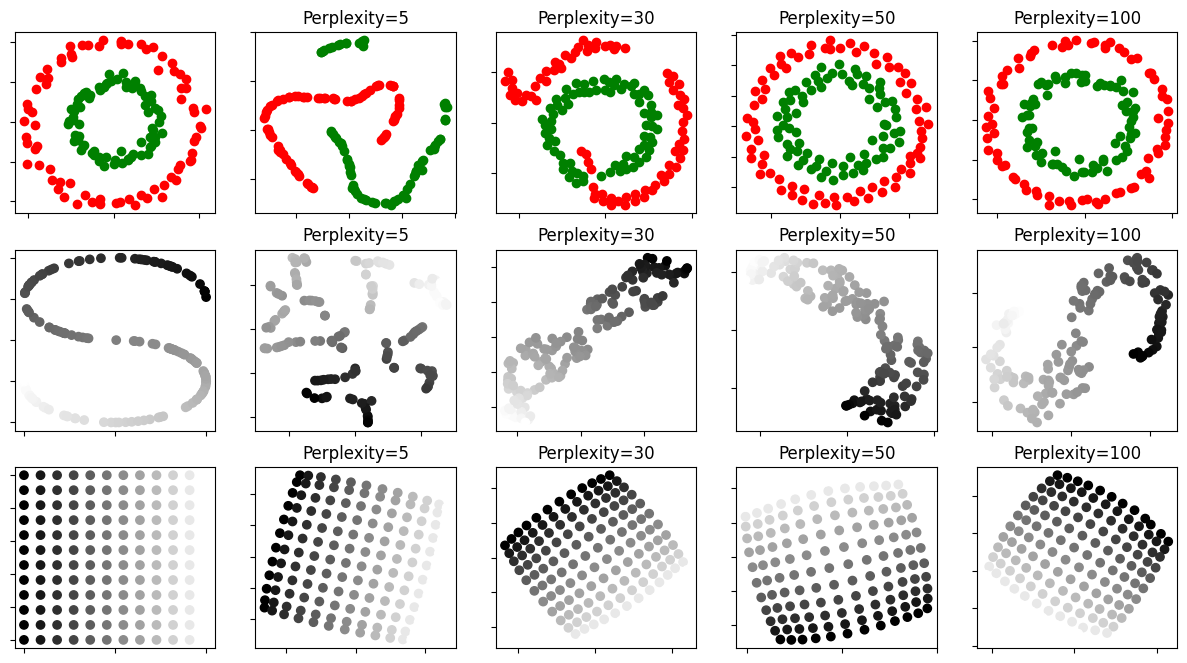

In [73]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import datasets, manifold

n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


plt.show()